# MACHINE LEARNING
## PRÁCTICA FINAL (2/2)

In [1]:
nombres = "Alejandro Allepuz, Pablo Carcelén, Juan Dorrego, Teresa Fernández, Ricardo Marín y Andrés Piqueras"
if nombres == "":
    print("Rellena tu nombre completo!")
else:
    print("Gracias!: ", nombres, ":)")

Gracias!:  Alejandro Allepuz, Pablo Carcelén, Juan Dorrego, Teresa Fernández, Ricardo Marín y Andrés Piqueras :)


**Nótese que este *Notebook* se corresponde sólo con la segunda parte del trabajo final de la asignatura. En él, podrá encontrar la parte de *Modelling* de los datos así como las conclusiones y sus comentarios.**

## 1. Cargar datos

Esta parte del trabajo comienza con la Carga y Escala de datos. Anteriormente, utilizamos todo el notebook del preprocessing para realizar el tratamiento de los datos y guardarlos en dos archivos CSV que ahora solo tendremos que importar para seguir trabajando sobre ellos. 

In [ ]:
from google.colab import drive
drive.mount('/content/folders/')

Drive already mounted at /content/folders/; to attempt to forcibly remount, call drive.mount("/content/folders/", force_remount=True).


In [ ]:
# cargamos librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt # para dibujar
import plotly.express as px
%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

In [ ]:
import sys
sys.path.append('/content/folders/MyDrive/Colab Notebooks/Machine_final/')

In [ ]:
import funciones_auxiliares 

In [ ]:
df_train = pd.read_csv("/content/folders/MyDrive/Colab Notebooks/Machine_final/df_procesado_train",sep="\t",low_memory=False)
df_test = pd.read_csv("/content/folders/MyDrive/Colab Notebooks/Machine_final/df_procesado_test",sep="\t",low_memory=False)
df_train.shape

(169046, 19)

In [ ]:
df_train

,Unnamed: 0,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,P_SEX,P_AGE,P_PSN,P_SAFE,P_USER,V_AGE,C_SEV
0,0,1,4,23,1,6,2,6,2,1,80,1,1,53,11,1,1,12,0
1,1,12,2,14,2,21,2,1,1,1,1,8,1,49,11,2,1,7,0
2,2,6,6,0,2,32,2,3,2,2,1,1,1,20,11,2,1,4,0
3,3,8,2,19,2,35,2,1,1,1,3,14,1,62,11,9,5,12,0
4,4,6,7,3,2,22,1,1,1,1,18,1,1,17,11,2,1,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169041,169041,2,6,0,2,21,2,2,1,1,18,1,0,18,11,2,1,7,1
169042,169042,1,1,16,12,21,1,6,3,1,18,1,1,61,11,2,1,0,1
169043,169043,8,3,20,5,21,2,1,1,1,18,1,1,33,21,2,2,12,1
169044,169044,8,5,22,2,31,1,6,2,3,18,6,0,37,13,2,2,5,1


In [ ]:
df_train=df_train.drop(columns=df_train.columns[0])
df_train

,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,P_SEX,P_AGE,P_PSN,P_SAFE,P_USER,V_AGE,C_SEV
0,1,4,23,1,6,2,6,2,1,80,1,1,53,11,1,1,12,0
1,12,2,14,2,21,2,1,1,1,1,8,1,49,11,2,1,7,0
2,6,6,0,2,32,2,3,2,2,1,1,1,20,11,2,1,4,0
3,8,2,19,2,35,2,1,1,1,3,14,1,62,11,9,5,12,0
4,6,7,3,2,22,1,1,1,1,18,1,1,17,11,2,1,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169041,2,6,0,2,21,2,2,1,1,18,1,0,18,11,2,1,7,1
169042,1,1,16,12,21,1,6,3,1,18,1,1,61,11,2,1,0,1
169043,8,3,20,5,21,2,1,1,1,18,1,1,33,21,2,2,12,1
169044,8,5,22,2,31,1,6,2,3,18,6,0,37,13,2,2,5,1


In [ ]:
y_train=df_train['C_SEV'].copy()
y_train

0         0
1         0
2         0
3         0
4         0
         ..
169041    1
169042    1
169043    1
169044    1
169045    1
Name: C_SEV, Length: 169046, dtype: int64

In [ ]:
df_train.drop('C_SEV',axis=1, inplace=True)

In [ ]:
df_train

,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,P_SEX,P_AGE,P_PSN,P_SAFE,P_USER,V_AGE
0,1,4,23,1,6,2,6,2,1,80,1,1,53,11,1,1,12
1,12,2,14,2,21,2,1,1,1,1,8,1,49,11,2,1,7
2,6,6,0,2,32,2,3,2,2,1,1,1,20,11,2,1,4
3,8,2,19,2,35,2,1,1,1,3,14,1,62,11,9,5,12
4,6,7,3,2,22,1,1,1,1,18,1,1,17,11,2,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169041,2,6,0,2,21,2,2,1,1,18,1,0,18,11,2,1,7
169042,1,1,16,12,21,1,6,3,1,18,1,1,61,11,2,1,0
169043,8,3,20,5,21,2,1,1,1,18,1,1,33,21,2,2,12
169044,8,5,22,2,31,1,6,2,3,18,6,0,37,13,2,2,5


In [ ]:
df_test=df_test.drop(columns=df_test.columns[0])
y_test=df_test['C_SEV'].copy()
df_test.drop('C_SEV',axis=1, inplace=True)


In [ ]:
df_test

,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,P_SEX,P_AGE,P_PSN,P_SAFE,P_USER,V_AGE
0,12,6,11,2,36,2,1,1,1,3,1,1,49,11,2,1,13
1,8,3,14,2,35,2,1,1,1,1,1,1,33,11,2,1,11
2,10,1,15,2,35,2,1,1,1,3,1,1,35,11,2,1,8
3,4,5,9,2,21,4,2,1,1,18,7,1,31,11,1,1,1
4,7,2,16,1,31,1,2,1,1,18,5,1,4,32,2,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50632,12,7,5,1,4,1,2,1,4,18,1,1,18,23,2,2,9
50633,11,6,18,2,33,1,6,2,1,18,1,1,5,13,2,2,6
50634,7,7,17,2,21,2,1,1,1,18,80,1,19,11,13,1,3
50635,9,5,18,2,35,2,1,1,1,3,1,1,22,13,2,2,4


In [ ]:
df_train.shape

(169046, 17)

In [ ]:
df_test.shape

(50637, 17)

In [ ]:
y_train

0         0
1         0
2         0
3         0
4         0
         ..
169041    1
169042    1
169043    1
169044    1
169045    1
Name: C_SEV, Length: 169046, dtype: int64

In [ ]:
y_test

0        0
1        0
2        0
3        0
4        0
        ..
50632    0
50633    0
50634    0
50635    0
50636    0
Name: C_SEV, Length: 50637, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
#Calculamos el mejor árbol como el árbol cuyos hiperparámetros maximizan el accuracy

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import matplotlib.pyplot as plt

## 2. Escalar datos

Como sabemos, la escala de datos no es necesaria para todos los modelos pero si que lo será para la regresión logística, KNN y SVM. Por lo que lo realizamos a continuación. 

In [ ]:

df_train_normal=(df_train-df_train.mean())/df_train.std()
df_test_normal=(df_test-df_test.mean())/df_test.std()

In [ ]:
df_train_normal.describe()

,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,P_SEX,P_AGE,P_PSN,P_SAFE,P_USER,V_AGE
count,1.690460e+05,1.690460e+05,1.690460e+05,1.690460e+05,1.690460e+05,1.690460e+05,1.690460e+05,1.690460e+05,1.690460e+05,1.690460e+05,1.690460e+05,1.690460e+05,1.690460e+05,1.690460e+05,1.690460e+05,1.690460e+05,1.690460e+05
mean,-1.151922e-14,2.890948e-14,-5.358898e-14,4.474768e-14,3.971553e-14,-3.234462e-15,-1.189305e-15,7.182934e-15,4.725964e-14,3.662801e-14,6.403756e-14,-5.068886e-14,5.352229e-16,1.667196e-14,-7.233437e-15,-7.816323e-14,2.202084e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.695927e+00,-1.611677e+00,-2.303469e+00,-3.647893e-01,-1.402994e+00,-2.089766e-01,-2.096662e-01,-2.334508e-01,-1.900474e-01,-1.168778e+00,-2.831353e-01,-1.284405e+00,-1.852609e+00,-2.967280e-01,-2.658179e-01,-5.939118e-01,-1.343501e+00
25%,-8.141946e-01,-1.101982e+00,-7.490380e-01,-3.647893e-01,-1.108285e+00,-2.089766e-01,-2.096662e-01,-2.334508e-01,-1.900474e-01,-9.889118e-01,-2.831353e-01,-1.284405e+00,-8.509390e-01,-2.967280e-01,-1.498887e-01,-5.939118e-01,-8.162724e-01
50%,6.753760e-02,-8.259044e-02,1.145348e-01,-4.946937e-02,-1.652148e-01,-1.267998e-01,-2.096662e-01,-2.334508e-01,-1.900474e-01,3.600874e-01,-2.831353e-01,7.785658e-01,-1.655855e-01,-2.967280e-01,-1.498887e-01,-5.939118e-01,-1.133005e-01
75%,9.492698e-01,9.368009e-01,8.053930e-01,-4.946937e-02,5.420876e-01,-1.267998e-01,2.586987e-02,-1.645225e-01,4.004409e-02,3.600874e-01,-2.831353e-01,7.785658e-01,6.779264e-01,-1.281926e-01,-1.498887e-01,6.801313e-01,5.896714e-01
max,1.537091e+00,1.446497e+00,1.668966e+00,2.359952e+01,3.253413e+00,6.282991e+00,1.839768e+01,5.211883e+00,1.798718e+01,5.935951e+00,1.179585e+01,7.785658e-01,3.313901e+00,7.034561e+00,8.892593e+00,4.502261e+00,1.605505e+01


# 3. Modelos:


#### **Comentario importante respecto a la selección de scoring functions**:


Pasamos ahora a realizar los modelos de clasifiación sobre nuestros datos.

Lo más importante en este punto no es tanto qué modelos vamos a utilizar (veremos varios y compararemos resultados) como con respecto a qué scoring function vamos a evaluar los modelos.

Por defecto, los modelos de clasificación suelen evaluarse conforme al accuracy general. En nuestro caso, **contamos con una base de datos muy desbalanceada** (menos del 10% de observaciones con accidente mortal) y sin embargo, esta es la clase que más nos interesa para el análisis.

Desde el punto de vista de la administración pública, parece más razonable querer predecir con exactitud qué accidentes serán mortales frente a cuales no. Naturalmente, siempre será preferible mejorar ambas estimaciones, pero **es habitual que exista un trade-off entre mejorar la exactitud con la que reducimos los falsos negativos (recall) y la precisión.**

En este sentido, parece tener más sentido de negocio y de objetivos de los stakeholders el querer estar sesgado hacia minimizar el error de tipo 2 en la clase de accidentes con fallecidos, es decir, **tenemos un sesgo positivo hacia predecir mejor la clase minoritaria.**

Con este objetivo en mente, existen una serie de métricas mejores que el accuracy (que trata ambas clases por igual) a la hora de entrenar nuestros modelos. Hemos considerado razonable aplicar a ambos modelos un entrenamiento por las 2 siguientes métricas:

1) **F2-Score**: 

F2-score es una métrica perteneciente a la familia de las funciones F-score, caracterizadas de la siguiente manera:

$$ F_{\beta} = (1+\beta^2) \cdot \frac{precision \cdot recall}{(\beta^2 \cdot precision) + recall}$$


F2 (β=2) tiene un mayor sesgo hacia los falsos negativos que la clásica F1, que toma como igual de importantes los falsos negativos y los falsos positivos.

**Con esta métrica, consideramos más importante predecir todos los accidentes con fallecidos (Minimizar falsos negativos en clase minoritaria)**, pese a que a veces predeciremos como accidentes mortales algunos que no lo serán, reduciendo precision y accuracy acosta de una recall en la clase minoritaria muy alta.

El uso de esta métrica corresponderá con un stakeholder que quiera minimizar los accidentes mortales, pese a predecirlos de más. Esto último podría repercutir en determinados gastos adicionales (gastos en ambulancias, equipos preparados para intervenciones de urgencia) que en última instancia quedarían en desuso. Sin embargo, este tipo de decisiones pueden ocurrir y ocurren en algunas actividades y partidas que desempeña la administración pública.

2) **Average precision**

Average precision es la aproximación discreta al área debajo de la curva de precision-recall. Esta curva refleja el comportamiento de la precisión del modelo conforme aumentamos el recall, con lo que en el fondo **nos informa de cómo de bien nuestro modelo es capaz de aumentar recall sin disminuir precisión**. Esta curva es más relevante para el estudio que la curva ROC, ya que la curva P-R hace un mayor hincapié en la clase minoritaria en caso de datos desbalanceados. Así, usar average precision como scoring function consiste en maximizar el área debajo de la curva P-R. Su fórmula consiste en la aproximación discreta a la integral (área debajo de la curva):

$$Avg. Precision=\sum_{k=1}^{N}{Precision(k) \cdot \Delta Recall(k)} $$

Por la naturaleza de la métrica, average precision también tiene un sesgo hacia la clase minoritaria, pero no a costa de una precisión baja. Es decir, **conforma una métrica más equilibrada, para un stakeholder que quiera priorizar ligeramente accidentes mortales, pero no a costa de una accuracy baja y una peor estimación para los accidentes sin fallecidos.** El trade-off será, naturalmente, que quedarán muchos accidentes mortales falsamente clasificados como no mortales (menos recall clase minoritaria o mas falsos negativos).


Una vez planteadas las métricas, la estructura que seguiremos será:

Aplicaremos los modelos de clasificación. En cada uno de ellos calcularemos:

1) El mejor modelo utilizando GridSearch

2) Matriz de confusión

3) Curva P-R y área

Haremos esto en cada modelo para las 2 score functions: F2-score y Avg. Precision


In [ ]:
#todas las librerías 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

from sklearn.feature_selection import RFE, RFECV

In [ ]:
#F2 score no existe por defecto. Hemos de construir una función auxiliar:
from sklearn.metrics import make_scorer,fbeta_score
def f2_func(y_true, y_pred):
    f2_score = fbeta_score(y_true, y_pred, beta=2)
    return f2_score

def my_f2_scorer():
    return make_scorer(f2_func)

# 3.1 Regresión Logística

El modelo de regresión logística es un algoritmo de clasificación que nos permite, a través de una regresión modificada para dar un resultado entre 0 y 1, predecir si, en base a un determinado imput, se va a dar una determinada característica o no. A diferencia de la regresión lineal, en el que la variable a predecir puede tomar cualquier valor, en el caso de la logística sólo podrá tomar los valores 0 y 1. Por este motivo, se trata de un algoritmo de clasificación.

En nuestro caso, vamos a utilizar una serie de datos para intentar predecir si en un determinado accidente va a haber víctimas mortales (1) o si no (0). En base al valor al que más se acerque nuestra regresión interpretaremos que es más probable una cosa o la otra.

Por tanto, el primer paso es entrenar el modelo con el conjunto de datos de entrenamiento de la forma, $X_1, \cdots,X_{n}$, asociados respectivamente a un valor binario $Y_i \in \left\lbrace0,1\right\rbrace$. De aquí obtenemos un conjunto de coeficientes $\beta$.

Así, tendremos que:
$$
P(Y_i = 1) = \mathrm{logistic}(\sum \beta_i X_i),
$$

donde sabemos que:

$$
\mathrm{logistic}(x) = \frac{1}{1+e^{-x}}.
$$

Utilizar este modelo tienen numerosas ventajas, entre las cuales están:

-Es fácil de entrenar y su interpretación es sencilla (El valor de la regresión es la $P(Y_i = 1)$)

-Puede interpretar los coeficientes del modelo como indicadores de importancia de características

-Buena precisión para muchos conjuntos de datos simples y funciona bien cuando el conjunto de datos es separable linealmente.

-Puede extenderse fácilmente a múltiples clases (regresión multinomial) y una vista probabilística natural de las predicciones de clases.

Por otra parte, tiene también algunas desventajas:

-La principal limitación de la regresión logística es el supuesto de linealidad entre la variable dependiente y las variables independientes.

-Solo se puede usar para predecir funciones discretas. Por tanto, la variable dependiente de Regresión logística está ligada al conjunto de números discretos. No podemos diferenciar entre heridos leves, graves y muertos, sino que sólo consideramos los estados fallecidos y no fallecidos

-Es difícil obtener relaciones complejas mediante regresión logística. Los algoritmos más potentes y compactos, como las redes neuronales, pueden superar fácilmente a este algoritmo.

-Está sesgada hacia la clase mayoritaria.


## 3.1.1 Regresión logística con F2-score

Fijaremos class_weight='balanced' para que balancee de acuerdo al peso de cada clase, si bien nuestros datos de entrenamiento ya están balanceados.

In [ ]:
vectorC = np.logspace(-3,3,21)
param_grid = {'C': vectorC}

logreg_f2 = GridSearchCV(LogisticRegression(random_state=0, class_weight='balanced'),
                    scoring=my_f2_scorer(), 
                    param_grid=param_grid, 
                    cv = 5,
                    verbose = 1)

logreg_f2.fit(df_train_normal, y_train)

print("best mean cross-validation score: {:.3f}".format(logreg_f2.best_score_))
print("best parameters: {}".format(logreg_f2.best_params_))


Fitting 5 folds for each of 21 candidates, totalling 105 fits
best mean cross-validation score: 0.621
best parameters: {'C': 0.501187233627272}


Como vemos, después de hacer las combinaciones de variables indicadas, el parámetro para la regresión logística que nos selecciona este método es C=0.501.

In [ ]:
y_predlogreg_f2=logreg_f2.predict(df_test_normal)

### 3.1.1.1 Matriz de confusión

Observamos cómo se comporta este algoritmo de clasificación con la matriz de confusión. La matriz de confusión es una metrica que utilizaremos de ahora en adelante para todos los modelos y que será clave para la interpretación de estos. Esta métrica es utilizada para analizar como de bueno es un modelo, consiste en una matriz en la que (en este caso pues es el tema que estamos tratando) podemos ver cuantos accidentes se han caracterizado correctamentes y cuantos lo han hecho incorrectamente. En su diagonal encontramos aquellos sucesos clasificados adecuadamente (Accidente grave o no). 

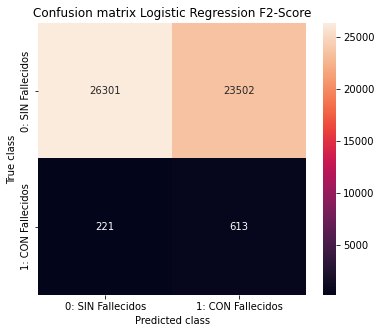

Accuracy: 0.5315085806821099 
Precision SIN Fallecidos:  0.9916672950757861 
Precision CON Fallecidos:  0.02541986315571221 
Recall SIN Fallecidos:  0.5281007168242877 
Recall CON Fallecidos:  0.7350119904076738


In [ ]:
conf_matrixlogreg_f2 = confusion_matrix(y_test, y_predlogreg_f2)
plt.figure(figsize=(6, 5))
labels = ['0: SIN Fallecidos','1: CON Fallecidos']
sns.heatmap(conf_matrixlogreg_f2, xticklabels=labels, yticklabels=labels, annot=True, fmt="d");
plt.title("Confusion matrix Logistic Regression F2-Score")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Accuracy_logreg_f2 = (conf_matrixlogreg_f2[0][0]+conf_matrixlogreg_f2[1][1])/(conf_matrixlogreg_f2[0][0]+conf_matrixlogreg_f2[0][1]+conf_matrixlogreg_f2[1][0]+conf_matrixlogreg_f2[1][1])
Precision_sin_fall_logreg_f2=(conf_matrixlogreg_f2[0][0])/(conf_matrixlogreg_f2[0][0]+conf_matrixlogreg_f2[1][0])
Precision_con_fall_logreg_f2=(conf_matrixlogreg_f2[1][1])/(conf_matrixlogreg_f2[1][1]+conf_matrixlogreg_f2[0][1])
Recall_sin_fall_logreg_f2=(conf_matrixlogreg_f2[0][0])/(conf_matrixlogreg_f2[0][0]+conf_matrixlogreg_f2[0][1])
Recall_con_fall_logreg_f2=(conf_matrixlogreg_f2[1][1])/(conf_matrixlogreg_f2[1][1]+conf_matrixlogreg_f2[1][0])


print('Accuracy:', Accuracy_logreg_f2, '\n'
      'Precision SIN Fallecidos: ', Precision_sin_fall_logreg_f2, '\n'
      'Precision CON Fallecidos: ', Precision_con_fall_logreg_f2, '\n'
      'Recall SIN Fallecidos: ', Recall_sin_fall_logreg_f2, '\n'
      'Recall CON Fallecidos: ', Recall_con_fall_logreg_f2)

Vemos cómo este modelo no es demasiado eficaz a la hora de predecir accidentes mortales, debido a que tan sólo es capaz de anticipar un 73.5% de estos, quedando un porcentaje significativo sin detectar, lo que podría llevar a grandes ineficiencias a la hora de prestar atención sanitaria a estos.

Sin embargo, esto no es lo más grave. El modelo predice de manera errónea que un 47.2%, 23502 accidentes, van a presentar víctimas mortales cuando no sucede así en la realidad, por lo que la utilización de este modelo podría llevarnos a un enorme gasto en atención que se desperdiciaría en víctimas menos graves de lo supuesto, a la vez que un gran porcentaje de víctimas fatales quedaría sin detectar.

### 3.1.1.2 Curva precision-recall

A continuación vamos a representar la curva P-R, que ya hemos indicado en la introducción que nos indica el tradeoff entre precisión y recall.

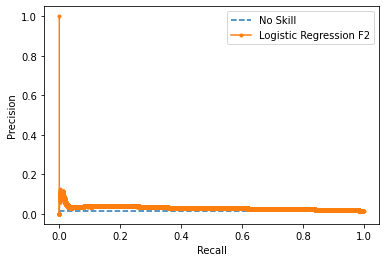

0.030950458761451846


In [ ]:
y_scoreslogreg_f2 = logreg_f2.predict_proba(df_test_normal)

precision_logreg_f2, recall_logreg_f2, thresholds_logreg_f2 = precision_recall_curve(y_test, y_scoreslogreg_f2[:, 1])

no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall_logreg_f2, precision_logreg_f2, marker='.', label='Logistic Regression F2')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.show()

auc_precision_recall_logreg_f2 = auc(recall_logreg_f2, precision_logreg_f2)
print(auc_precision_recall_logreg_f2)

Como puede observarse, el área debajo de la curva es muy pequeña, por lo que a priori podemos concluir que, como ya esterábamos, este método no es demasiado efectivo a la hora de clasificar. La precisión es muy baja en todo momento, ya que a pesar de utilizar un recall muy reducido, su valor no supera el 0.2.

Así, concluimos que lo que le falta a este algoritmo es precisión, como hemos mencionado anteriormente, reforzando nuestra conclusión.



## 3.1.2 Regresión logística con Average-precision


Ahora utilizaremos el método de Average-precision, explicado anteriormente.

In [ ]:
vectorC = np.logspace(-3,3,21)
param_grid = {'C': vectorC}

logreg_pr = GridSearchCV(LogisticRegression(random_state=0, class_weight='balanced'),
                    scoring='average_precision', 
                    param_grid=param_grid, 
                    cv = 5,
                    verbose = 1)

logreg_pr.fit(df_train_normal, y_train)

print("best mean cross-validation score: {:.3f}".format(logreg_pr.best_score_))
print("best parameters: {}".format(logreg_pr.best_params_))


Fitting 5 folds for each of 21 candidates, totalling 105 fits
best mean cross-validation score: 0.636
best parameters: {'C': 3.981071705534969}


In [ ]:
y_predlogreg_pr=logreg_pr.predict(df_test_normal)

Aquí tenemos el nuevo parámetro que nos proporciona para la regresión logística, C=3.98.

### 3.1.2.1 Matriz de confusión

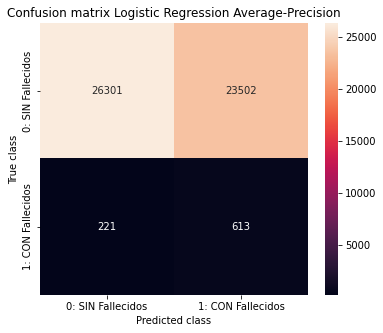

Accuracy: 0.5315085806821099 
Precision SIN Fallecidos:  0.9916672950757861 
Precision CON Fallecidos:  0.02541986315571221 
Recall SIN Fallecidos:  0.5281007168242877 
Recall CON Fallecidos:  0.7350119904076738


In [ ]:
conf_matrixlogreg_pr = confusion_matrix(y_test, y_predlogreg_pr)
plt.figure(figsize=(6, 5))
labels = ['0: SIN Fallecidos','1: CON Fallecidos']
sns.heatmap(conf_matrixlogreg_pr, xticklabels=labels, yticklabels=labels, annot=True, fmt="d");
plt.title("Confusion matrix Logistic Regression Average-Precision")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Accuracy_logreg_pr = (conf_matrixlogreg_pr[0][0]+conf_matrixlogreg_pr[1][1])/(conf_matrixlogreg_pr[0][0]+conf_matrixlogreg_pr[0][1]+conf_matrixlogreg_pr[1][0]+conf_matrixlogreg_pr[1][1])
Precision_sin_fall_logreg_pr=(conf_matrixlogreg_pr[0][0])/(conf_matrixlogreg_pr[0][0]+conf_matrixlogreg_pr[1][0])
Precision_con_fall_logreg_pr=(conf_matrixlogreg_pr[1][1])/(conf_matrixlogreg_pr[1][1]+conf_matrixlogreg_pr[0][1])
Recall_sin_fall_logreg_pr=(conf_matrixlogreg_pr[0][0])/(conf_matrixlogreg_pr[0][0]+conf_matrixlogreg_pr[0][1])
Recall_con_fall_logreg_pr=(conf_matrixlogreg_pr[1][1])/(conf_matrixlogreg_pr[1][1]+conf_matrixlogreg_pr[1][0])


print('Accuracy:', Accuracy_logreg_pr, '\n'
      'Precision SIN Fallecidos: ', Precision_sin_fall_logreg_pr, '\n'
      'Precision CON Fallecidos: ', Precision_con_fall_logreg_pr, '\n'
      'Recall SIN Fallecidos: ', Recall_sin_fall_logreg_pr, '\n'
      'Recall CON Fallecidos: ', Recall_con_fall_logreg_pr)

Vemos cómo este modelo no es demasiado eficaz a la hora de predecir accidentes mortales, debido a que tan sólo es capaz de anticipar un 73.5% de estos, quedando un porcentaje significativo sin detectar, lo que podría llevar a grandes ineficiencias a la hora de prestar atención sanitaria a estos.

Sin embargo, esto no es lo más grave. El modelo predice de manera errónea que un 47.2%, 23502 accidentes, van a presentar víctimas mortales cuando no sucede así en la realidad, por lo que la utilización de este modelo podría llevarnos a un enorme gasto en atención que se desperdiciaría en víctimas menos graves de lo supuesto, a la vez que un gran porcentaje de víctimas fatales quedaría sin detectar.

### 3.1.2.2 Curva precision-recall

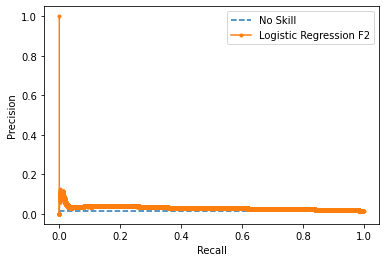

0.03095036673084608


In [ ]:
y_scoreslogreg_pr = logreg_pr.predict_proba(df_test_normal)

precision_logreg_pr, recall_logreg_pr, thresholds_logreg_pr = precision_recall_curve(y_test, y_scoreslogreg_pr[:, 1])

no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall_logreg_pr, precision_logreg_pr, marker='.', label='Logistic Regression F2')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.show()

auc_precision_recall_logreg_pr = auc(recall_logreg_pr, precision_logreg_pr)
print(auc_precision_recall_logreg_pr)

Como puede observarse, el área debajo de la curva es muy pequeña, por lo que a priori podemos concluir que, como ya esterábamos, este método no es demasiado efectivo a la hora de clasificar. La precisión es muy baja en todo momento, ya que a pesar de utilizar un recall muy reducido, su valor no supera el 0.2.

Así, concluimos que lo que le falta a este algoritmo es precisión, como hemos mencionado anteriormente, reforzando nuestra conclusión.


# 3.2 Árboles de Decisión

Este método se basa en ir haciendo particiones de la población a analizar con el fin de encontrar aquellas características que mejor la clasifican. De este modo, se comienza con el total de la población (ya sea la de entrenamiento o test), y se trata de encontrar mediante métodos de selección la mejor forma de separarla en clases. A continuación, se establece un nodo que controla para cada muestra si se tiene dicha característica o no, y se vuelve a clasificar cada elemento de las subpoblaciones que han resultado de la primera partición. Así, se genera un árbol de decisión, que nos servirá para, analizando por fases las características de un individuo, clasificarlo de la manera correcta, en nuestro caso asignándole el valor 0 si, por las características del accidente, creemos que no va a dar como resultado víctimas mortales, o el valor 1 en caso contrario.

La ventaja de este método consiste en que es de una interpretación muy sencilla, ya que su forma de clasificar se basa en la que utiliza el cerebro humano y es muy lógica. Además, ordena de manera jerárquica las cualidades que hay que observar en cada fase para clasificar, de manera que nos indica en qñue hay que fijarse intuitivamente para saber cuál va a ser el resultado de un determinado accidente.

Sin embargo, no suele ser el método que reporte la tasa de acierto más alta o mayor precisión de la predicción.


## 3.2.1 Árbol de decisión con F2-score

Repetimos Decision Tree con scoring=f2.

In [ ]:
#mejoraArbol_f2=DecisionTreeClassifier() 

#criterion_rej=['gini','entropy'] #rejilla
#max_depth_rej=np.linspace(1,20,20).astype(int)  #cuantos nodos de profundidad queremos
#h_parameters = {'criterion':criterion_rej, 'max_depth':max_depth_rej} 
#cv_f2 = GridSearchCV(mejoraArbol_f2, h_parameters, cv=5, scoring=my_f2_scorer()) #el scoring es la medida de error que evalua
#cv_f2.fit(df_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             scoring=make_scorer(f2_func))

In [ ]:
#mejorArbol_f2=cv_f2.best_estimator_   #Calculamos el arbol con los parametros dados

### 3.1.1.1 Vista del Árbol

Aquí tenemos el mejor árbol generado mediante F2, por el que vamos a ir dividiendo las muestras de nuestro dataset de test.

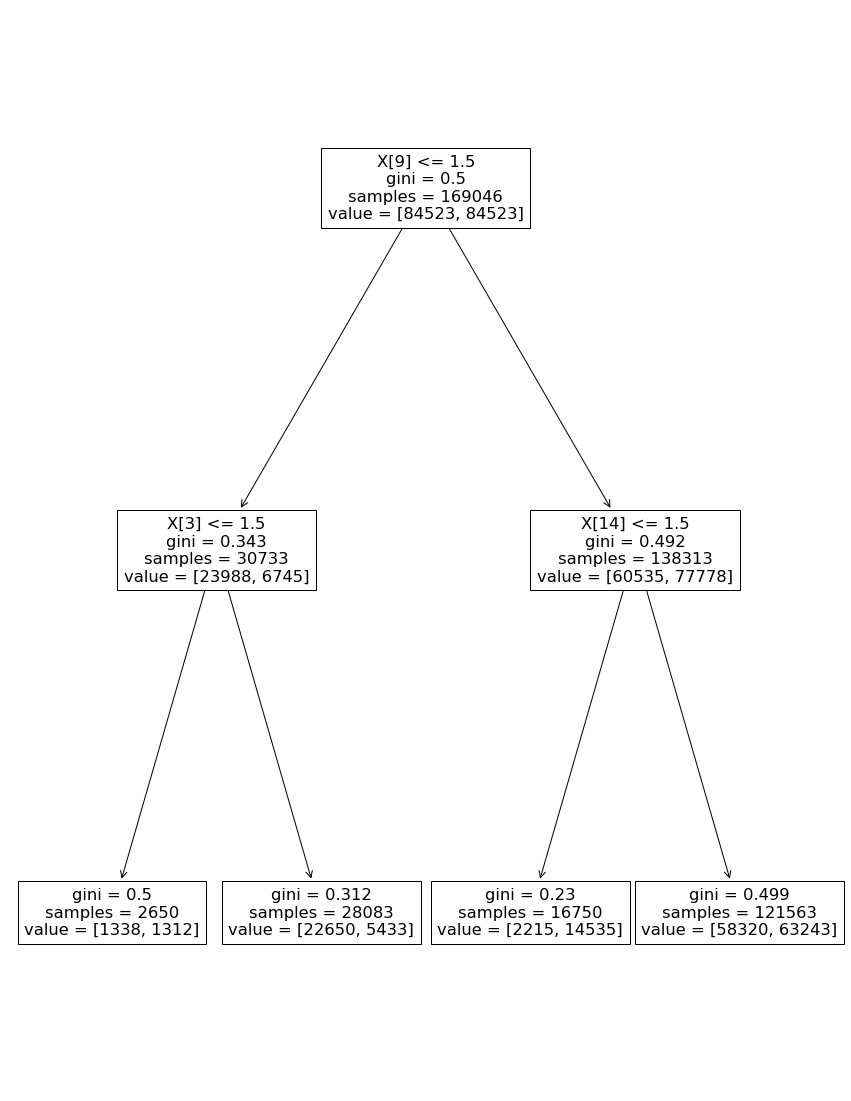

In [ ]:
mejorArbol_f2=DecisionTreeClassifier(criterion='gini',max_depth=2)
mejorArbol_f2.fit(df_train,y_train)
y_predDT_f2=mejorArbol_f2.predict(df_test)

plt.figure(figsize=(15, 20)) 
tree.plot_tree(mejorArbol_f2);

### 3.1.1.2 Matriz de confusión

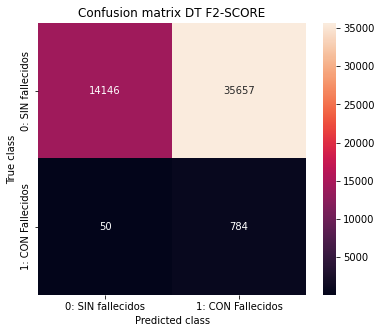

Accuracy: 0.29484369137192173 
Precision Fully paid:  0.9964778810932657 
Precision Charged off :  0.021514228478911115 
Recall Fully paid :  0.2840391141095918 
Recall Charged off:  0.9400479616306955


In [ ]:
#Matriz:

conf_matrixDT_f2 = confusion_matrix(y_test, y_predDT_f2)
plt.figure(figsize=(6, 5))
labels = ['0: SIN fallecidos','1: CON Fallecidos']
sns.heatmap(conf_matrixDT_f2, xticklabels=labels, yticklabels=labels, annot=True, fmt="d");
plt.title("Confusion matrix DT F2-SCORE")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Accuracy_DT_f2 = (conf_matrixDT_f2[0][0]+conf_matrixDT_f2[1][1])/(conf_matrixDT_f2[0][0]+conf_matrixDT_f2[0][1]+conf_matrixDT_f2[1][0]+conf_matrixDT_f2[1][1])
Precision_sin_fall_DT_f2=(conf_matrixDT_f2[0][0])/(conf_matrixDT_f2[0][0]+conf_matrixDT_f2[1][0])
Precision_con_fall_DT_f2=(conf_matrixDT_f2[1][1])/(conf_matrixDT_f2[1][1]+conf_matrixDT_f2[0][1])
Recall_sin_fall_DT_f2=(conf_matrixDT_f2[0][0])/(conf_matrixDT_f2[0][0]+conf_matrixDT_f2[0][1])
Recall_con_fall_DT_f2=(conf_matrixDT_f2[1][1])/(conf_matrixDT_f2[1][1]+conf_matrixDT_f2[1][0])


print('Accuracy:', Accuracy_DT_f2, '\n'
      'Precision Sin Fallecidos: ', Precision_sin_fall_DT_f2, '\n'
      'Precision Con Fallecidos: ', Precision_con_fall_DT_f2, '\n'
      'Recall Sin Fallecidos: ', Recall_sin_fall_DT_f2, '\n'
      'Recall Con Fallecidos: ', Recall_con_fall_DT_f2 ) 

Vemos cómo este método mejora significativamente frente al de regresión logística en cuanto a precisión. Conseguimos que el 94.0% de los positivos sean ciertos. Sin embargo, aún seguimos detectando demasiados fallecidos que luego no ocurren, por lo que en este sentido el modelo no funciona tan bien, pero puede ser útil si lo que queremos es asegurarnos de predecir accidentesa mortales y nos importa menos dedicar recursos a otros que finalmente no lo son.

### 3.1.1.3 Curva Precision-Recall

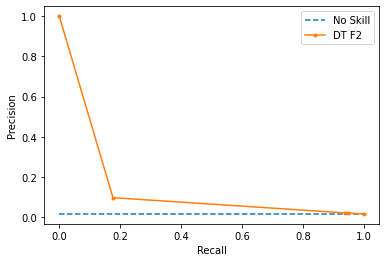

0.14321927917020755


In [ ]:
#curva precision-recall
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

y_scoresDT_f2 = mejorArbol_f2.predict_proba(df_test)

precision_DT_f2, recall_DT_f2, thresholds = precision_recall_curve(y_test, y_scoresDT_f2[:, 1])

no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall_DT_f2, precision_DT_f2, marker='.', label='DT F2')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.show()

auc_precision_recall_DT_f2 = auc(recall_DT_f2, precision_DT_f2)
print(auc_precision_recall_DT_f2)

De este modo, vemos cómo la curva P-R contiene más área, 0.14, debajo de ella, debido a que hemos conseguido una precisión muy aceptable. Sin embargo, este valor dista de ser alto, ya que esto sucede a costa de perder recall.

## 3.2.2 Árbol de decisión con Average-precision

Realizamos ahora la clasificación mediante average precision, que es un proxy para calcular el precision-recall AUC.

Este proxy consiste en:

In [ ]:
#mejoraArbol=DecisionTreeClassifier() 

#criterion_rej=['gini','entropy'] #rejilla
#max_depth_rej=np.linspace(1,20,20).astype(int)  #cuantos nodos de profundidad queremos
#h_parameters = {'criterion':criterion_rej, 'max_depth':max_depth_rej} 
#cv_pr = GridSearchCV(mejoraArbol, h_parameters, cv=5, scoring='average_precision') #el scoring es la medida de error que evalua
#cv_pr.fit(df_train, y_train)



#mejorArbol_pr=cv_pr.best_estimator_   #Calculamos el arbol con los parametros dados

In [ ]:
#cv_pr.best_estimator_ 

DecisionTreeClassifier(criterion='entropy', max_depth=10)

### 3.1.2.1 Vista del árbol

Aquí representamos el mejor árbol seleccionado mediante este algoritmo.

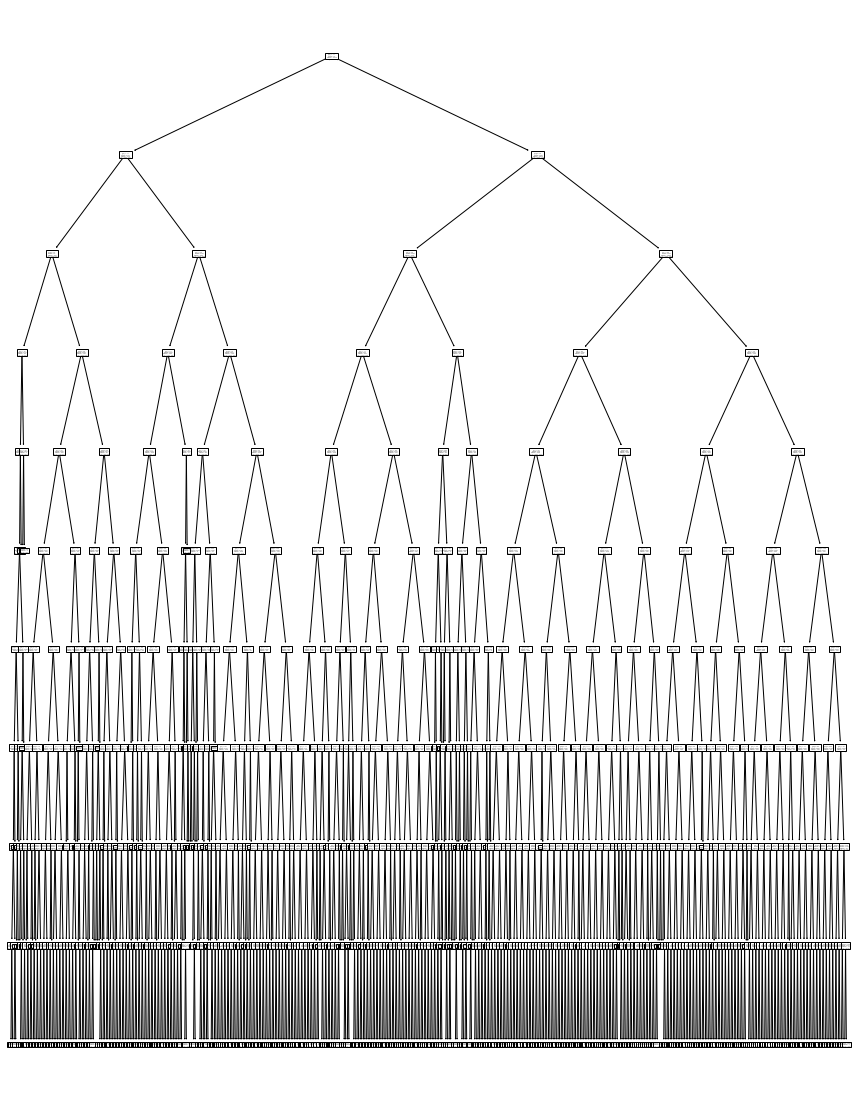

In [ ]:
mejorArbol_pr=DecisionTreeClassifier(criterion='entropy',max_depth=10)
mejorArbol_pr.fit(df_train,y_train)
y_predDT_pr=mejorArbol_pr.predict(df_test)

plt.figure(figsize=(15, 20)) 
tree.plot_tree(mejorArbol_pr);

### 3.1.2.2 Matriz de confusión

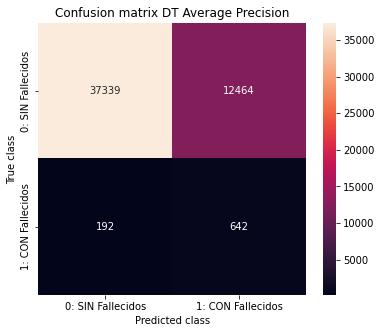

Accuracy: 0.7500641823172779 
Precision Fully paid:  0.9948842290373291 
Precision Charged off :  0.048985197619410954 
Recall Fully paid :  0.7497339517699737 
Recall Charged off:  0.7697841726618705


In [ ]:
#Matriz:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
conf_matrixDT_pr = confusion_matrix(y_test, y_predDT_pr)
plt.figure(figsize=(6, 5))
labels = ['0: SIN Fallecidos','1: CON Fallecidos']
sns.heatmap(conf_matrixDT_pr, xticklabels=labels, yticklabels=labels, annot=True, fmt="d");
plt.title("Confusion matrix DT Average Precision")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Accuracy_DT_pr = (conf_matrixDT_pr[0][0]+conf_matrixDT_pr[1][1])/(conf_matrixDT_pr[0][0]+conf_matrixDT_pr[0][1]+conf_matrixDT_pr[1][0]+conf_matrixDT_pr[1][1])
Precision_sin_fall_DT_pr=(conf_matrixDT_pr[0][0])/(conf_matrixDT_pr[0][0]+conf_matrixDT_pr[1][0])
Precision_con_fall_DT_pr=(conf_matrixDT_pr[1][1])/(conf_matrixDT_pr[1][1]+conf_matrixDT_pr[0][1])
Recall_sin_fall_DT_pr=(conf_matrixDT_pr[0][0])/(conf_matrixDT_pr[0][0]+conf_matrixDT_pr[0][1])
Recall_con_fall_DT_pr=(conf_matrixDT_pr[1][1])/(conf_matrixDT_pr[1][1]+conf_matrixDT_pr[1][0])


print('Accuracy:', Accuracy_DT_pr, '\n'
      'Precision Sin Fallecidos: ', Precision_sin_fall_DT_pr, '\n'
      'Precision Con Fallecidos: ', Precision_con_fall_DT_pr, '\n'
      'Recall Sin Fallecidos: ', Recall_sin_fall_DT_pr, '\n'
      'Recall Con Fallecidos: ', Recall_con_fall_DT_pr ) 

Los resultados mediante este modelo son más equilibrados que los del anterior. Vemos cómo hemos perdido precisión a la hora de detectar un fallecido verdadero, pero hemos reducido muy considerablemente el error de un falso diagnóstico con fallecidos, por lo que podríamos ahorrar recursos a la hora de gestionar accidentes con este modelo, pero a costa de perder más vidas.

### 3.1.2.3 Curva Precision-recall

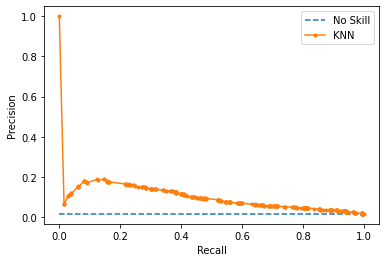

0.10266951502393806


In [ ]:
#curva precision-recall
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

y_scoresDT_pr = mejorArbol_pr.predict_proba(df_test)

precision_DT_pr, recall_DT_pr, thresholds_DT_pr = precision_recall_curve(y_test, y_scoresDT_pr[:, 1])

no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall_DT_pr, precision_DT_pr, marker='.', label='KNN')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.show()

auc_precision_recall_DT_pr = auc(recall_DT_pr, precision_DT_pr)
print(auc_precision_recall_DT_pr)

Lo que hemos expuesto anteriormente se observa en este gráfico. Vemos que el área bajo la curva es similar al 0.14 del caso anterior, ya que en abos modelos tenemos un tradeoff muy similar entre precisión y recall, pareciendo este último algo peor, ya que el área bajo la curva es inferior, denotando perores valores a la hora de realizar ese tradeoff.

# 3.3 Random Forest

Los modelos Random Forest están formados por un conjunto de árboles de decisión individuales, cada uno entrenado con una muestra ligeramente distinta de los datos de entrenamiento generada mediante bootstrapping. La predicción de una nueva observación se obtiene agregando las predicciones de todos los árboles individuales que forman el modelo.

De este modo se consigue que la eficacia del modelo aumente, al precio de un mayor coste computacional.

Ventajas:

-Ser uno de los algoritmos de aprendizaje más certeros que hay disponible

-Dar estimaciones de qué variables son importantes en la clasificación

-Tener un método eficaz para estimar datos perdidos y mantener la exactitud cuando una gran proporción de los datos está perdida.

Inconvenientes:

-Sobreajusta en ciertos grupos de datos con tareas de clasificación/regresión si la varianza es alta.

-A diferencia de los árboles de decisión, la clasificación hecha por random forests es difícil de interpretar.

-Si los datos contienen grupos de atributos correlacionados con similar relevancia para el rendimiento, entonces los grupos más pequeños están favorecidos sobre los grupos más grandes.

## 3.3.1 Random Forest con F2-score

En primer lugar, generamos un random forest de tamaño n=200 mediante F2-score.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#hiper parámetros
#criterion_rej=['gini','entropy']
#max_depth_rej=np.linspace(1,20,20).astype(int)
#h_parameters = {'criterion':criterion_rej, 'max_depth':max_depth_rej} 

#rf_f2 = GridSearchCV(RandomForestClassifier(n_estimators = 200), h_parameters, cv=5, scoring=my_f2_scorer(),verbose=3)
#rf_f2.fit(df_train, y_train)
#print("best mean cross-validation score: {:.3f}".format(rf_f2.best_score_))
#print("best parameters: {}".format(rf_f2.best_params_))


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .......criterion=gini, max_depth=1;, score=0.703 total time=   6.3s
[CV 2/5] END .......criterion=gini, max_depth=1;, score=0.718 total time=   6.4s
[CV 3/5] END .......criterion=gini, max_depth=1;, score=0.707 total time=   6.2s
[CV 4/5] END .......criterion=gini, max_depth=1;, score=0.710 total time=   7.1s
[CV 5/5] END .......criterion=gini, max_depth=1;, score=0.697 total time=   9.1s
[CV 1/5] END .......criterion=gini, max_depth=2;, score=0.700 total time=  10.7s
[CV 2/5] END .......criterion=gini, max_depth=2;, score=0.724 total time=  10.7s
[CV 3/5] END .......criterion=gini, max_depth=2;, score=0.725 total time=   8.8s
[CV 4/5] END .......criterion=gini, max_depth=2;, score=0.714 total time=  11.3s
[CV 5/5] END .......criterion=gini, max_depth=2;, score=0.726 total time=   8.3s
[CV 1/5] END .......criterion=gini, max_depth=3;, score=0.711 total time=  10.2s
[CV 2/5] END .......criterion=gini, max_depth=3

In [ ]:
rf_f2_fit = RandomForestClassifier(n_estimators = 200, criterion=rf_f2.best_params_['criterion'], max_depth=rf_f2.best_params_['max_depth']).fit(df_train,y_train)
y_predRF_f2=rf_f2_fit.predict(df_test)

### 3.3.1.1 Matriz de confusión

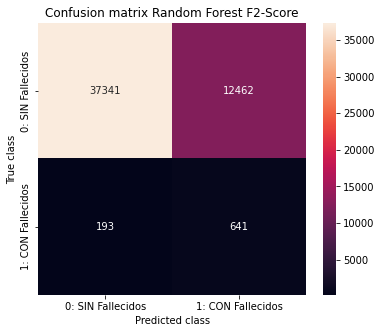

Accuracy: 0.7824120702253293 
Precision SIN Fallecidos:  0.9961876007471279 
Precision CON Fallecidos:  0.05928682707287519 
Recall SIN Fallecidos:  0.7817601349316307 
Recall CON Fallecidos:  0.8213429256594724


In [ ]:
#Matriz:

conf_matrixRF_f2 = confusion_matrix(y_test, y_predRF_f2)
plt.figure(figsize=(6, 5))
labels = ['0: SIN Fallecidos','1: CON Fallecidos']
sns.heatmap(conf_matrixDT_pr, xticklabels=labels, yticklabels=labels, annot=True, fmt="d");
plt.title("Confusion matrix Random Forest F2-Score")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Accuracy_rf_f2 = (conf_matrixRF_f2[0][0]+conf_matrixRF_f2[1][1])/(conf_matrixRF_f2[0][0]+conf_matrixRF_f2[0][1]+conf_matrixRF_f2[1][0]+conf_matrixRF_f2[1][1])
Precision_sin_fall_rf_f2=(conf_matrixRF_f2[0][0])/(conf_matrixRF_f2[0][0]+conf_matrixRF_f2[1][0])
Precision_con_fall_rf_f2=(conf_matrixRF_f2[1][1])/(conf_matrixRF_f2[1][1]+conf_matrixRF_f2[0][1])
Recall_sin_fall_rf_f2=(conf_matrixRF_f2[0][0])/(conf_matrixRF_f2[0][0]+conf_matrixRF_f2[0][1])
Recall_con_fall_rf_f2=(conf_matrixRF_f2[1][1])/(conf_matrixRF_f2[1][1]+conf_matrixRF_f2[1][0])


print('Accuracy:', Accuracy_rf_f2, '\n'
      'Precision SIN Fallecidos: ', Precision_sin_fall_rf_f2, '\n'
      'Precision CON Fallecidos: ', Precision_con_fall_rf_f2, '\n'
      'Recall SIN Fallecidos: ', Recall_sin_fall_rf_f2, '\n'
      'Recall CON Fallecidos: ', Recall_con_fall_rf_f2) 

Vemos cómo los resultados son muy similares a los del apartado anterior, debido a que el árbol óptimo , con las pequeñas muestras aleatorias que ha sido generado, ha resultado ser similar, por lo que el análisis es el mismo.

### 3.3.1.2 Curva Precision-recall

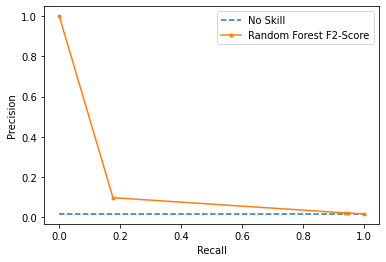

0.20122525748566672


In [ ]:
#curva precision-recall

#estimamos probabilidades:
y_scoresRF_f2_prob = rf_f2_fit.predict_proba(df_test)

precision_rf_f2, recall_rf_f2, thresholds_rf_f2 = precision_recall_curve(y_test, y_scoresRF_f2_prob[:, 1])

no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Random Forest F2-Score')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.show()

auc_precision_recall_rf_f2 = auc(recall_rf_f2, precision_rf_f2)
print(auc_precision_recall_rf_f2)

Sin embargo, el área bajo la curva es mayor, lo que muestra que este modelo tiene un menor tradeoff entre precisión y recall y por tanto sería preferible al utilizado anteriormente a la hora de elaborar predicciones.

## 3.3.2 Random Forest con Average-precision

Ahora repetimos el procedimiento mediante average-precision, con n=200.

In [ ]:
#hiper parámetros
#criterion_rej=['gini','entropy']
#max_depth_rej=np.linspace(1,20,20).astype(int)
#h_parameters = {'criterion':criterion_rej, 'max_depth':max_depth_rej} 

#Esta vez el scoring será average precision:
#rf_pr = GridSearchCV(RandomForestClassifier(n_estimators = 200), h_parameters, cv=5, scoring='average_precision',verbose=3)
#rf_pr.fit(df_train, y_train)
#print("best mean cross-validation score: {:.3f}".format(rf_pr.best_score_))
#print("best parameters: {}".format(rf_pr.best_params_))


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .......criterion=gini, max_depth=1;, score=0.709 total time=   8.1s
[CV 2/5] END .......criterion=gini, max_depth=1;, score=0.715 total time=   8.0s
[CV 3/5] END .......criterion=gini, max_depth=1;, score=0.713 total time=   8.1s
[CV 4/5] END .......criterion=gini, max_depth=1;, score=0.715 total time=   7.9s
[CV 5/5] END .......criterion=gini, max_depth=1;, score=0.713 total time=   7.8s
[CV 1/5] END .......criterion=gini, max_depth=2;, score=0.746 total time=  10.0s
[CV 2/5] END .......criterion=gini, max_depth=2;, score=0.750 total time=   9.9s
[CV 3/5] END .......criterion=gini, max_depth=2;, score=0.747 total time=   9.9s
[CV 4/5] END .......criterion=gini, max_depth=2;, score=0.749 total time=   9.9s
[CV 5/5] END .......criterion=gini, max_depth=2;, score=0.756 total time=  10.9s
[CV 1/5] END .......criterion=gini, max_depth=3;, score=0.764 total time=  12.5s
[CV 2/5] END .......criterion=gini, max_depth=3

In [ ]:
rf_pr_fit = RandomForestClassifier(n_estimators = 200, criterion='gini', max_depth=20).fit(df_train,y_train)
y_predRF_pr=rf_pr_fit.predict(df_test)

### 3.3.2.1 Matriz de confusión

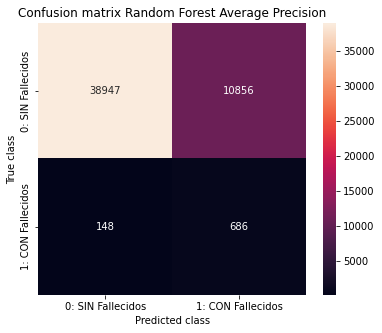

Accuracy: 0.7826885478997571 
Precision SIN Fallecidos:  0.996214349661082 
Precision CON Fallecidos:  0.05943510656731935 
Recall SIN Fallecidos:  0.782021163383732 
Recall CON Fallecidos:  0.8225419664268585


In [ ]:
#Matriz:

conf_matrixRF_pr = confusion_matrix(y_test, y_predRF_pr)
plt.figure(figsize=(6, 5))
labels = ['0: SIN Fallecidos','1: CON Fallecidos']
sns.heatmap(conf_matrixRF_pr, xticklabels=labels, yticklabels=labels, annot=True, fmt="d");
plt.title("Confusion matrix Random Forest Average Precision")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Accuracy_rf_pr = (conf_matrixRF_pr[0][0]+conf_matrixRF_pr[1][1])/(conf_matrixRF_pr[0][0]+conf_matrixRF_pr[0][1]+conf_matrixRF_pr[1][0]+conf_matrixRF_pr[1][1])
Precision_sin_fall_rf_pr=(conf_matrixRF_pr[0][0])/(conf_matrixRF_pr[0][0]+conf_matrixRF_pr[1][0])
Precision_con_fall_rf_pr=(conf_matrixRF_pr[1][1])/(conf_matrixRF_pr[1][1]+conf_matrixRF_pr[0][1])
Recall_sin_fall_rf_pr=(conf_matrixRF_pr[0][0])/(conf_matrixRF_pr[0][0]+conf_matrixRF_pr[0][1])
Recall_con_fall_rf_pr=(conf_matrixRF_pr[1][1])/(conf_matrixRF_pr[1][1]+conf_matrixRF_pr[1][0])


print('Accuracy:', Accuracy_rf_pr, '\n'
      'Precision SIN Fallecidos: ', Precision_sin_fall_rf_pr, '\n'
      'Precision CON Fallecidos: ', Precision_con_fall_rf_pr, '\n'
      'Recall SIN Fallecidos: ', Recall_sin_fall_rf_pr, '\n'
      'Recall CON Fallecidos: ', Recall_con_fall_rf_pr) 

Los resultados obtenidos son los más equilibrados hasta ahora, ya que como vemos, wl número de fallecidos predicho es ligeramente más preciso que en los modelos anteriores, y a la vez el número de falsos fallecidos predichos es significativamente menor, por lo que es el mejor modelo que tenemos hasta este punto en térmnos de equilibrio. El de árbol de decisión con F2-score continúa teniendo el mayor ratio de fallecidos predichos.

### 3.3.2.2 Curva Precision-recall

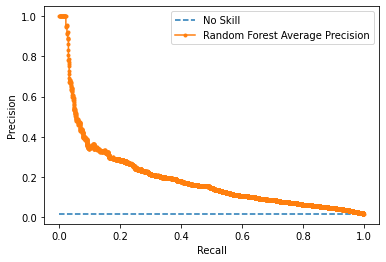

0.19431063548791216


In [ ]:
#curva precision-recall

#estimamos probabilidades:
y_scoresRF_pr_prob = rf_pr_fit.predict_proba(df_test)

precision_rf_pr, recall_rf_pr, thresholds_rf_pr = precision_recall_curve(y_test, y_scoresRF_pr_prob[:, 1])

no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall_rf_pr, precision_rf_pr, marker='.', label='Random Forest Average Precision')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.show()

auc_precision_recall_rf_pr = auc(recall_rf_pr, precision_rf_pr)
print(auc_precision_recall_rf_pr)

Como es natural, este modelo, al ser muy equilibrado, presenta un área bajo la curva muy alta para lo que hemos observado hasta ahora, de 0.19, sugiriendo que podemos alcanzar una precisión razonable sin reducir demasiado el recall. Por todo ello, este modelo es satisfactorio.

# 3.4 KNN

Es un método de clasificación no paramétrico que se basa en asignar a cada punto del hiperespacio de datos la categoría que esté más representada en sus alrededores. Esto es, para un k, Se va considerando la categoría de las observaciones más cercanas al punto estudiado hasta encontrar k, momento en el que se le asigna al punto la categoría más numerosa en esas k observaciones. Por tanto, para evitar empates entre las categorías 0 y 1, el valor de k será impar.

Como ventajas destacan la simplicidad del algoritmo, la idea intuirtiva en la que se fundamenta, por la que la clase de un dato será la de sus vecinos más cercanos, y que puede ser utilizado para clasificación multiclase sin tener que hacer ningún ajuste complejo.

Sin embargo, es posible que este algoritmo no funcione adecuadamente porque requiere que todos los datos estén en la misma escala, ya que si no puede interpretar que algunos están más lejos cuando no es así. Además, requiere que los datos del test de ambas categorías sean similares en número, ya que si no dará prioridad a la clase más numerosa. Por último, es muy sensible a outliers y escoger el k óptimo a veces puede resultar complicado o estar injustificado.

El algoritmo KNN es conocido por su sencillez pero también por su mayor costo computacional en comparación con otros algoritmos.

A fin de hacer más rápida la detección del número óptimo de vecinos en el intervalo [1,60], hemos decidido utilizar un método iterativo de la siguiente manera:

mirar primero los valores [1,30,60]

2) seleccionar el valor del parámetro que mejor accuracy da en el intervalo: x

3) proceder de nuevo en ese subintervalo: [x+10,x,x-10]

4) escoger el valor del parámetro que mejor accuracy da en el nuevo subintervalo y repetir con un intervalo de la mitad de tamaño: [x+5,x,x-5]

## 3.4.1 KNN con F2-score

Generamos el KNN con F2-score como hemos indicado. Creamos un proceso iterativo para escoger un n adecuado.

In [ ]:
KNN=KNeighborsClassifier() 
n_neighbors=np.linspace(1,60,3).astype(int)
h_parameters = {'n_neighbors':n_neighbors} 
cv = GridSearchCV(KNN, h_parameters, cv=3, scoring=my_f2_scorer(),verbose=3) 
cv.fit(df_train_normal, y_train)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .....................n_neighbors=1;, score=0.650 total time=  53.1s
[CV 2/3] END .....................n_neighbors=1;, score=0.657 total time=  53.2s
[CV 3/3] END .....................n_neighbors=1;, score=0.663 total time=  58.9s
[CV 1/3] END ....................n_neighbors=30;, score=0.674 total time= 1.9min
[CV 2/3] END ....................n_neighbors=30;, score=0.675 total time= 2.0min
[CV 3/3] END ....................n_neighbors=30;, score=0.676 total time= 2.1min
[CV 1/3] END ....................n_neighbors=60;, score=0.671 total time= 1.8min
[CV 2/3] END ....................n_neighbors=60;, score=0.675 total time= 1.8min
[CV 3/3] END ....................n_neighbors=60;, score=0.675 total time= 2.2min


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1, 30, 60])},
             scoring=make_scorer(f2_func), verbose=3)

best mean cross-validation score: 0.675
best parameters: {'n_neighbors': 30}


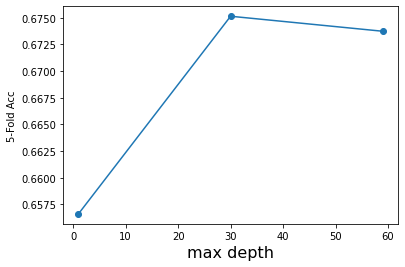

In [ ]:
print("best mean cross-validation score: {:.3f}".format(cv.best_score_))
print("best parameters: {}".format(cv.best_params_))
maxDepth = range(1,60,29)
scores = np.array(cv.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold Acc')
plt.show()

Estos son los resultados de la primera iteración.

In [ ]:
KNN=KNeighborsClassifier() 
n_neighbors=np.linspace(20,40,3).astype(int)
h_parameters = {'n_neighbors':n_neighbors} 
cv = GridSearchCV(KNN, h_parameters, cv=3, scoring=my_f2_scorer(),verbose=3) 
cv.fit(df_train_normal, y_train)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END ....................n_neighbors=20;, score=0.668 total time= 2.1min
[CV 2/3] END ....................n_neighbors=20;, score=0.670 total time= 2.0min
[CV 3/3] END ....................n_neighbors=20;, score=0.673 total time= 2.0min
[CV 1/3] END ....................n_neighbors=30;, score=0.674 total time= 2.1min
[CV 2/3] END ....................n_neighbors=30;, score=0.675 total time= 2.0min
[CV 3/3] END ....................n_neighbors=30;, score=0.676 total time= 2.2min
[CV 1/3] END ....................n_neighbors=40;, score=0.675 total time= 2.2min
[CV 2/3] END ....................n_neighbors=40;, score=0.677 total time= 2.1min
[CV 3/3] END ....................n_neighbors=40;, score=0.678 total time= 2.1min


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([20, 30, 40])},
             scoring=make_scorer(f2_func), verbose=3)

best mean cross-validation score: 0.677
best parameters: {'n_neighbors': 40}


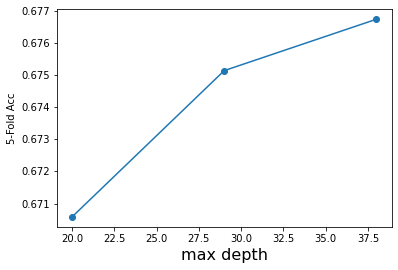

In [ ]:
print("best mean cross-validation score: {:.3f}".format(cv.best_score_))
print("best parameters: {}".format(cv.best_params_))
maxDepth = range(20,40,9)
scores = np.array(cv.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold Acc')
plt.show()

Estos son los resultados de la segunda iteración.

In [ ]:
KNN=KNeighborsClassifier() 
n_neighbors=np.linspace(35,45,3).astype(int)
h_parameters = {'n_neighbors':n_neighbors} 
cv = GridSearchCV(KNN, h_parameters, cv=3, scoring=my_f2_scorer(),verbose=3) 
cv.fit(df_train_normal, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END ....................n_neighbors=35;, score=0.692 total time= 2.2min
[CV 2/3] END ....................n_neighbors=35;, score=0.694 total time= 2.0min
[CV 3/3] END ....................n_neighbors=35;, score=0.693 total time= 2.0min
[CV 1/3] END ....................n_neighbors=40;, score=0.675 total time= 2.1min
[CV 2/3] END ....................n_neighbors=40;, score=0.677 total time= 2.0min
[CV 3/3] END ....................n_neighbors=40;, score=0.678 total time= 2.1min
[CV 1/3] END ....................n_neighbors=45;, score=0.687 total time= 2.2min
[CV 2/3] END ....................n_neighbors=45;, score=0.690 total time= 2.1min
[CV 3/3] END ....................n_neighbors=45;, score=0.690 total time= 2.1min


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([35, 40, 45])},
             scoring=make_scorer(f2_func), verbose=3)

best mean cross-validation score: 0.693
best parameters: {'n_neighbors': 35}


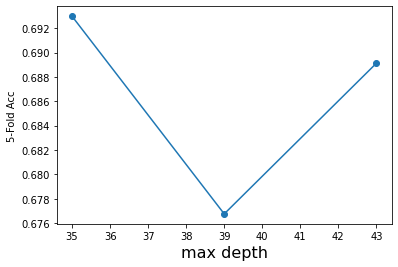

In [ ]:
print("best mean cross-validation score: {:.3f}".format(cv.best_score_))
print("best parameters: {}".format(cv.best_params_))
maxDepth = range(35,45,4)
scores = np.array(cv.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold Acc')
plt.show()

Tras este proceso iterativo escogemos n=35

In [ ]:
knn_final_f2=KNeighborsClassifier(n_neighbors=35).fit(df_train_normal,y_train)
y_pred_knn_f2=knn_final_f2.predict(df_test_normal)

### 3.4.1.1 Matriz de confusión

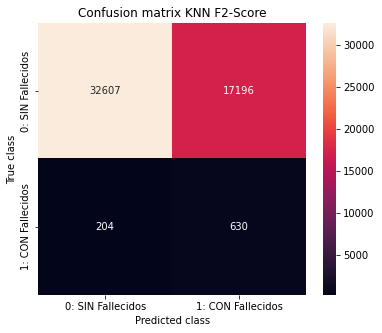

Accuracy: 0.6563777474968896 
Precision SIN Fallecidos:  0.9937825729176191 
Precision CON Fallecidos:  0.035341635812857625 
Recall SIN Fallecidos:  0.6547195952051081 
Recall CON Fallecidos:  0.7553956834532374


In [ ]:
#Matriz:

conf_matrix_knn_f2 = confusion_matrix(y_test, y_pred_knn_f2)
plt.figure(figsize=(6, 5))
labels = ['0: SIN Fallecidos','1: CON Fallecidos']
sns.heatmap(conf_matrix_knn_f2, xticklabels=labels, yticklabels=labels, annot=True, fmt="d");
plt.title("Confusion matrix KNN F2-Score")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Accuracy_knn_f2 = (conf_matrix_knn_f2[0][0]+conf_matrix_knn_f2[1][1])/(conf_matrix_knn_f2[0][0]+conf_matrix_knn_f2[0][1]+conf_matrix_knn_f2[1][0]+conf_matrix_knn_f2[1][1])
Precision_sin_fall_knn_f2=(conf_matrix_knn_f2[0][0])/(conf_matrix_knn_f2[0][0]+conf_matrix_knn_f2[1][0])
Precision_con_fall_knn_f2=(conf_matrix_knn_f2[1][1])/(conf_matrix_knn_f2[1][1]+conf_matrix_knn_f2[0][1])
Recall_sin_fall_knn_f2=(conf_matrix_knn_f2[0][0])/(conf_matrix_knn_f2[0][0]+conf_matrix_knn_f2[0][1])
Recall_con_fall_knn_f2=(conf_matrix_knn_f2[1][1])/(conf_matrix_knn_f2[1][1]+conf_matrix_knn_f2[1][0])


print('Accuracy:', Accuracy_knn_f2, '\n'
      'Precision SIN Fallecidos: ', Precision_sin_fall_knn_f2, '\n'
      'Precision CON Fallecidos: ', Precision_con_fall_knn_f2, '\n'
      'Recall SIN Fallecidos: ', Recall_sin_fall_knn_f2, '\n'
      'Recall CON Fallecidos: ', Recall_con_fall_knn_f2) 

Vemos cómo los resultados no son del todo satisfactorio. Sin ser demasiado malos, no nos ofrecen tanta precisión como algunos estudiados anteriormente.

### 3.4.1.2 Curva de Precisión-recall

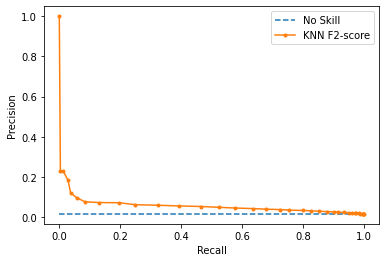

0.057416765354167426


In [ ]:
y_scores_knn_f2 = knn_final_f2.predict_proba(df_test_normal)

precision_knn_f2, recall_knn_f2, thresholds_knn_f2 = precision_recall_curve(y_test, y_scores_knn_f2[:, 1])

no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall_knn_f2, precision_knn_f2, marker='.', label='KNN F2-score')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.show()

auc_precision_recall_knn_f2 = auc(recall_knn_f2, precision_knn_f2)
print(auc_precision_recall_knn_f2)

Vemos que además el área bajo la curva es muy pequeña, por lo que definitivamente este método no es el más indicado para nuestro problema de clasificación.

## 3.4.2 KNN con Average Precision

Probamos ahora con average precision.

In [ ]:
KNN_pr=KNeighborsClassifier() 
n_neighbors=np.linspace(1,60,3).astype(int)
h_parameters = {'n_neighbors':n_neighbors} 
cv_pr = GridSearchCV(KNN_pr, h_parameters, cv=3, scoring='average_precision',verbose=3) 
cv_pr.fit(df_train_normal, y_train)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .....................n_neighbors=1;, score=0.598 total time= 1.1min
[CV 2/3] END .....................n_neighbors=1;, score=0.603 total time= 1.0min
[CV 3/3] END .....................n_neighbors=1;, score=0.602 total time= 1.0min
[CV 1/3] END ....................n_neighbors=30;, score=0.730 total time= 2.2min
[CV 2/3] END ....................n_neighbors=30;, score=0.731 total time= 2.1min
[CV 3/3] END ....................n_neighbors=30;, score=0.730 total time= 2.1min
[CV 1/3] END ....................n_neighbors=60;, score=0.730 total time= 2.2min
[CV 2/3] END ....................n_neighbors=60;, score=0.731 total time= 2.0min
[CV 3/3] END ....................n_neighbors=60;, score=0.731 total time= 2.1min


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1, 30, 60])},
             scoring='average_precision', verbose=3)

El proceso iterativo es el indicado en la introducción y utilizado en el apartado anterior.

best mean cross-validation score: 0.731
best parameters: {'n_neighbors': 60}


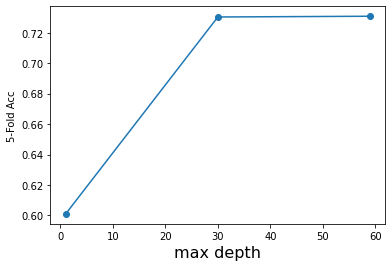

In [ ]:
print("best mean cross-validation score: {:.3f}".format(cv_pr.best_score_))
print("best parameters: {}".format(cv_pr.best_params_))
maxDepth = range(1,60,29)
scores = np.array(cv_pr.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold Acc')
plt.show()

Primera iteración.

In [ ]:
KNN_pr=KNeighborsClassifier() 
n_neighbors=np.linspace(30,60,4).astype(int)
h_parameters = {'n_neighbors':n_neighbors} 
cv_pr = GridSearchCV(KNN_pr, h_parameters, cv=3, scoring='average_precision',verbose=3) 
cv_pr.fit(df_train_normal, y_train)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END ....................n_neighbors=30;, score=0.730 total time= 2.1min
[CV 2/3] END ....................n_neighbors=30;, score=0.731 total time= 2.0min
[CV 3/3] END ....................n_neighbors=30;, score=0.730 total time= 2.0min
[CV 1/3] END ....................n_neighbors=40;, score=0.731 total time= 2.1min
[CV 2/3] END ....................n_neighbors=40;, score=0.731 total time= 2.0min
[CV 3/3] END ....................n_neighbors=40;, score=0.730 total time= 2.0min
[CV 1/3] END ....................n_neighbors=50;, score=0.731 total time= 2.1min
[CV 2/3] END ....................n_neighbors=50;, score=0.732 total time= 2.0min
[CV 3/3] END ....................n_neighbors=50;, score=0.730 total time= 2.0min
[CV 1/3] END ....................n_neighbors=60;, score=0.730 total time= 2.1min
[CV 2/3] END ....................n_neighbors=60;, score=0.731 total time= 2.0min
[CV 3/3] END ....................n_neighbors=60;,

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([30, 40, 50, 60])},
             scoring='average_precision', verbose=3)

best mean cross-validation score: 0.731
best parameters: {'n_neighbors': 50}


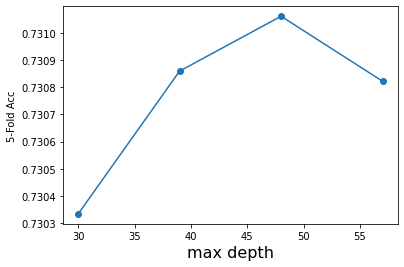

In [ ]:
print("best mean cross-validation score: {:.3f}".format(cv_pr.best_score_))
print("best parameters: {}".format(cv_pr.best_params_))
maxDepth = range(30,60,9)
scores = np.array(cv_pr.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold Acc')
plt.show()

Segunda iteración.

In [ ]:
KNN_pr=KNeighborsClassifier() 
n_neighbors=np.linspace(45,55,3).astype(int)
h_parameters = {'n_neighbors':n_neighbors} 
cv_pr = GridSearchCV(KNN_pr, h_parameters, cv=3, scoring='average_precision',verbose=3) 
cv_pr.fit(df_train_normal, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END ....................n_neighbors=45;, score=0.731 total time= 2.3min
[CV 2/3] END ....................n_neighbors=45;, score=0.732 total time= 2.1min
[CV 3/3] END ....................n_neighbors=45;, score=0.730 total time= 2.1min
[CV 1/3] END ....................n_neighbors=50;, score=0.731 total time= 2.2min
[CV 2/3] END ....................n_neighbors=50;, score=0.732 total time= 2.1min
[CV 3/3] END ....................n_neighbors=50;, score=0.730 total time= 2.1min
[CV 1/3] END ....................n_neighbors=55;, score=0.731 total time= 2.2min
[CV 2/3] END ....................n_neighbors=55;, score=0.731 total time= 2.1min
[CV 3/3] END ....................n_neighbors=55;, score=0.731 total time= 2.2min


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([45, 50, 55])},
             scoring='average_precision', verbose=3)

best mean cross-validation score: 0.731
best parameters: {'n_neighbors': 50}


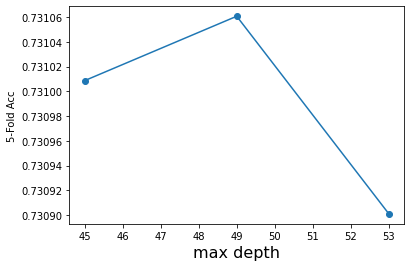

In [ ]:
print("best mean cross-validation score: {:.3f}".format(cv_pr.best_score_))
print("best parameters: {}".format(cv_pr.best_params_))
maxDepth = range(45,55,4)
scores = np.array(cv_pr.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold Acc')
plt.show()

Tras este proceso iterativo escogemos n=50

In [ ]:
knn_final_rp=KNeighborsClassifier(n_neighbors=50).fit(df_train_normal,y_train)
y_pred_knn_rp=knn_final_rp.predict(df_test_normal)

### 3.4.2.1 Matriz de confusión

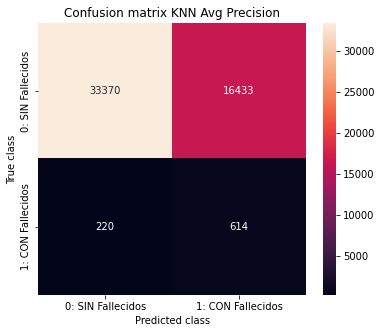

Accuracy: 0.6711298062681439 
Precision SIN Fallecidos:  0.993450431676094 
Precision CON Fallecidos:  0.03601806769519564 
Recall SIN Fallecidos:  0.6700399574322832 
Recall CON Fallecidos:  0.7362110311750599


In [ ]:
#Matriz:

conf_matrix_knn_pr = confusion_matrix(y_test, y_pred_knn_rp)
plt.figure(figsize=(6, 5))
labels = ['0: SIN Fallecidos','1: CON Fallecidos']
sns.heatmap(conf_matrix_knn_pr, xticklabels=labels, yticklabels=labels, annot=True, fmt="d");
plt.title("Confusion matrix KNN Avg Precision")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Accuracy_knn_pr = (conf_matrix_knn_pr[0][0]+conf_matrix_knn_pr[1][1])/(conf_matrix_knn_pr[0][0]+conf_matrix_knn_pr[0][1]+conf_matrix_knn_pr[1][0]+conf_matrix_knn_pr[1][1])
Precision_sin_fall_knn_pr=(conf_matrix_knn_pr[0][0])/(conf_matrix_knn_pr[0][0]+conf_matrix_knn_pr[1][0])
Precision_con_fall_knn_pr=(conf_matrix_knn_pr[1][1])/(conf_matrix_knn_pr[1][1]+conf_matrix_knn_pr[0][1])
Recall_sin_fall_knn_pr=(conf_matrix_knn_pr[0][0])/(conf_matrix_knn_pr[0][0]+conf_matrix_knn_pr[0][1])
Recall_con_fall_knn_pr=(conf_matrix_knn_pr[1][1])/(conf_matrix_knn_pr[1][1]+conf_matrix_knn_pr[1][0])


print('Accuracy:', Accuracy_knn_pr, '\n'
      'Precision SIN Fallecidos: ', Precision_sin_fall_knn_pr, '\n'
      'Precision CON Fallecidos: ', Precision_con_fall_knn_pr, '\n'
      'Recall SIN Fallecidos: ', Recall_sin_fall_knn_pr, '\n'
      'Recall CON Fallecidos: ', Recall_con_fall_knn_pr) 

Los resultados vuelven a ser muy similares, y por tanto de calidad media-baja. Aunque precisión y recall estén equilibrrados, no es el algoritmo más eficiente para clasificar esta base de datos.

### 3.4.2.2 Curva Precisión-Recall

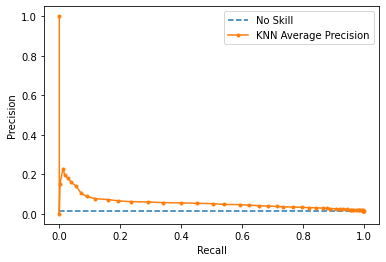

0.05670426853005958


In [ ]:
y_scores_knn_pr = knn_final_rp.predict_proba(df_test_normal)

precision_knn_pr, recall_knn_pr, thresholds_knn_pr = precision_recall_curve(y_test, y_scores_knn_pr[:, 1])

no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall_knn_pr, precision_knn_pr, marker='.', label='KNN Average Precision')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.show()

auc_precision_recall_knn_pr = auc(recall_knn_pr, precision_knn_pr)
print(auc_precision_recall_knn_pr)

En efecto, el área bajo la curva es muy reducida.

# 3.5 SVM

El algoritmo support-vector machines (SVM) separa las clases de datos por un hiperplano, que puede ser de una dimensión muy grande, de tal manera que todos los datos que pertenecen a la primera clase (en nuestro caso, Y=0) se encuentran a un lado, y los de la otra (Y=1), en el otro. Para ello, elige como separación el hiperplano que separa los conjuntos de datos con más margen, es decir, aquel tal que maximiza la distandia de las dos observaciones de categorías distintas más cercanas a él, siendo estas dos iguales.

El problema que presenta este método es que en ocasiones es imposible separar la muestra de manera perfecta en dos regiones, por lo que dependiendo del conjunto de datos a analizar, su eficacia puede disminuir ocnsiderablemente.

In [ ]:
from sklearn.svm import SVC

In [ ]:
vectorC = np.logspace(-3, 3, 5)
param_grid = {'C': vectorC}

svm_f2 = GridSearchCV(SVC(kernel='rbf'), scoring=my_f2_scorer(), param_grid=param_grid, cv=5, verbose=3).fit(df_train_normal, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ...........................C=0.001;, score=0.737 total time=22.1min
[CV 2/5] END ...........................C=0.001;, score=0.743 total time=26.6min
[CV 3/5] END ...........................C=0.001;, score=0.739 total time=23.6min
[CV 4/5] END ...........................C=0.001;, score=0.738 total time=22.6min
[CV 5/5] END ...........................C=0.001;, score=0.746 total time=21.8min
[CV 1/5] END .............C=0.03162277660168379;, score=0.716 total time=19.0min
[CV 2/5] END .............C=0.03162277660168379;, score=0.727 total time=18.8min
[CV 3/5] END .............C=0.03162277660168379;, score=0.719 total time=19.1min
[CV 4/5] END .............C=0.03162277660168379;, score=0.724 total time=19.2min
[CV 5/5] END .............C=0.03162277660168379;, score=0.724 total time=19.0min


En primer lugar, observamos que el Score que obtenemos en cada iteración es bastante bueno, lo que implica que el modelo arroja unos resultados bastante satisfactorios. Sin embargo, cada paso de la validación cruzada nos requiere aproxidamente un tiempo medio de unos veinte minutos, lo que hace impracticable el uso de este modelo para resolver el problema de clasificación al que nos enfrentamos en la práctica pues necesitaríamos muchas más iteraciones para conseguir unos resultados robustos. 

# 4. Extra: Multi Layer Perceptron Clasifier (MLP) (Deep Learning)

**Como añadido extra hemos añadido un algoritmo de clasifiación basado en perceptrón de múltiples capas** como el estudiado en la parte teórica de la asignatura.

Si bien quedaba fuera del temario de la parte práctica, con el conocimiento de la teoría y un poco de información sobre las librerías en internet nos ha sido sencillo plantear el MLP.

En esta ocasión no se ha hecho GridSearch para encontrar la mejor configuración, ya que el modelo MLP contempla muchos parámetros y la restricción computacional y de tiempo hace el GridSearch inviable. Hemos elegido por sentido práctico los siguientes parámetros, con los que se obtiene una estimación muy razonable en poco tiempo, lo que explica la eficiencia y el amplio uso de las redes neuronales en problemas de clasificación:

1) **Capas**: hemos elegido una red de 2 capas ocultas, una con 200 neuronas y otra con 150.

2) **Learning rate adaptativo**: es decir, el learning rate empieza en 0.001 (por defecto) pero irá disminuyendo conforme descienda el gradiente

3) **Early stopping**: esto significa que hay una stopping rule por la cual si en la siguiente iteración la loss function no disminuye un threshold lo suficientemente distinto de 0, el modelo para, a fin de no entrar en la zona de overfitting del modelo.

4) **Método de backpropagación**: adam, un algoritmo de descenso del gradiente estocástico ligeramente modificado, que es el que trae por defecto y que la literatura coincide en que se obtienen convergencias más rápidas.

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp     = MLPClassifier(hidden_layer_sizes=(200,150), learning_rate='adaptive', early_stopping=True)
mlp_fit = mlp.fit(np.array(df_train), y_train)

In [ ]:
pred_mlp = mlp.predict(np.array(df_test))

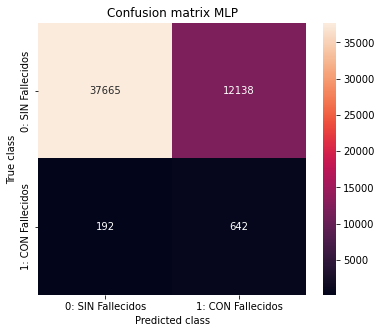

Accuracy: 0.7565021624503822 
Precision SIN Fallecidos:  0.9949282827482367 
Precision CON Fallecidos:  0.050234741784037557 
Recall SIN Fallecidos:  0.7562797421842058 
Recall CON Fallecidos:  0.7697841726618705


In [ ]:
#Matriz:

conf_matrixMLP = confusion_matrix(y_test, pred_mlp)
plt.figure(figsize=(6, 5))
labels = ['0: SIN Fallecidos','1: CON Fallecidos']
sns.heatmap(conf_matrixMLP, xticklabels=labels, yticklabels=labels, annot=True, fmt="d");
plt.title("Confusion matrix MLP")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Accuracy_mlp = (conf_matrixMLP[0][0]+conf_matrixMLP[1][1])/(conf_matrixMLP[0][0]+conf_matrixMLP[0][1]+conf_matrixMLP[1][0]+conf_matrixMLP[1][1])
Precision_sin_fall_mlp=(conf_matrixMLP[0][0])/(conf_matrixMLP[0][0]+conf_matrixMLP[1][0])
Precision_con_fall_mlp=(conf_matrixMLP[1][1])/(conf_matrixMLP[1][1]+conf_matrixMLP[0][1])
Recall_sin_fall_mlp=(conf_matrixMLP[0][0])/(conf_matrixMLP[0][0]+conf_matrixMLP[0][1])
Recall_con_fall_mlp=(conf_matrixMLP[1][1])/(conf_matrixMLP[1][1]+conf_matrixMLP[1][0])


print('Accuracy:', Accuracy_mlp, '\n'
      'Precision SIN Fallecidos: ', Precision_sin_fall_mlp, '\n'
      'Precision CON Fallecidos: ', Precision_con_fall_mlp, '\n'
      'Recall SIN Fallecidos: ', Recall_sin_fall_mlp, '\n'
      'Recall CON Fallecidos: ', Recall_con_fall_mlp) 

Vemos que precisiñon y recall son razonables y relativamente equilibraados, pero otra vez nos topamos con que no estamos frente al mejor de los algoritmos, a pesar de que sí puede servirnos para hacer predicciones en caso de necesitar algún tipo de apoyo al uso de otros modelos.

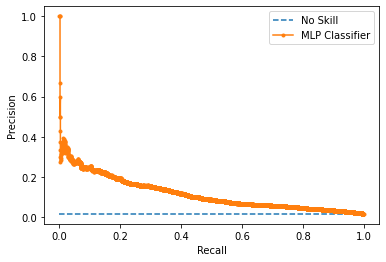

0.11827762023036832


In [ ]:
y_scoresMLP_prob = mlp.predict_proba(np.array(df_test))

precision_mlp, recall_mlp, thresholds_mlp = precision_recall_curve(y_test, y_scoresMLP_prob[:, 1])

no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall_mlp, precision_mlp, marker='.', label='MLP Classifier')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.show()

auc_precision_recall_mlp = auc(recall_mlp, precision_mlp)
print(auc_precision_recall_mlp)

Vemos que obtenemos resultados similares a otros algoritmos como el árbol de decisión, si bien algo menor en accuracy, pero sin el riesgo de overfitting en el que pueden caer Decision Tree y Random Forest y que aquí estamos evitando con nuestra stopping rule. El área bajo la curva es relativamente buena frente a la mayoría de modelos, pero no es la más alta que hemos visto.

# 5. Conclusión: modelos de clasificación

Modelo | Accuracy | Recall Accidentes Graves | PR-AUC
--------|----------|--------------------------|-------|
**Regresión Logística**|||| 
F2-score: C=0.5|0.53|           0.74          |  0.03
Avg. Precision: C=3.98|same|    same          |  same
**Árboles de decision**||||
F2-score: gini, 2 ramas|0.29|   0.94          |0.14
Avg. Precision: entropy, 10 ramas|0.75|0.77   |0.1|
**Random Forest**||||
F2-score: gini, 20 ramas|0.78|        0.82          |0.2|
Avg. Precision: (same)|same|same|same|
**KNN**||||
F2-score: n=35|0.66|            0.76          |0.06|
Avg. Precision: n=50|0.67|      0.74          |0.06|
**MLP**|0.76|0.77|0.12|




Recordemos que, tal y como expusimos en el notebook de preprocessing, la finalidad de este trabajo era emplear los algoritmos de Machine Learning y las técnicas de clasificación estudiadas durante el curso para la **detección de víctimas mortales** en siniestros de tráfico según una serie de características que definen las condiciones en las que ha ocurrido el suceso, el vehículo involucrado y al afectado. 

Además, tenemos como objetivo, **detectar que variables son las que más contribuyen a que existan fallecimientos** en un accidente y validar si las hipótesis de la Dirección General de Tráfico que hemos expuesto anteriormente son ciertas.


Este estudio podría ayudar a definir mejores planes de acción de los servicios de emergencias cuando reciben una llamada sobre una colisión, así como a las agencias de seguros para definir que tipo de cobertura deben hacer a ciertos tipos de vehículos (si es que hay alguna clase de vehículos cuyos siniestros sean de una mayor gravedad) o, por ejemplo, a la DGT para enfocar sus campañas sobre seguridad en aquellas caracteríticas más relevantes que pueden reducir la mortalidad en la carretera.

Vamos a revisar el accuracy de cada modelo que hemos empleado, esta métrica hace referencia al número de casos que el modelo ha acertado. El orden según el accuracy sería el siguiente: 

- **Random Forest:** *78%* de accuracy.
- **MLP:** *76%* de accuracy.
- **Árboles de decisión - Avg. Precision:** *75%* de accuracy.
- **KNN:** *66%-67%* de accuracy.
- **Regresión Logística:** *53%* de accuracy.
- **Árboles de Decisión - F2 Score:** *57.50%* de accuracy. 

Una vez examinados los niveles de Accuracy donde vemos que Random Forest y MLP destacan por encima del resto, vamos a examinar brevemente el AUC de cada modelo. En este estudio nos hemos encontrado con unos AUC muy bajos. Teniendo el más alto un valor de **0.20** para el Modelo **Random Forest** mientras que para **MLP** tenemos **0.11**. 

Por tanto, podemos concluir que el mejor modelo para este estudio de clasificación es el Modelo **Random Forest**, donde a parte de tener el accuracy y el AUC más alto también tiene un Recall de 82%. Sin embargo, nos encontramos con la cuestión de que para ello se han utilizado 20 ramas de árbol, lo que significa que existe un riesgo latente de **overfitting**. Es decir, hay un riesgo de que se sobreentrene al algoritmo de aprendizaje y que provoca que no sea preciso a la hora de estimar datos con los que no ha sido entrenado.   

Respecto al resto, destacar la pobre performance de los algoritmos KNN y Regresión. Ambos tienen un accuracy muy bajo con los peores recall para accidentes graves. Su AUC también roza los mínimos de este estudio. Son dos modelos que queda demostrado que son completamente inútiles para este trabajo.

También habría que destacar los buenos resultados de MLP, que tal y como hemos comentado, a pesar de tener un AUC y accuracy menor que Random Forest, no tenemos el riesgo de overfitting, lo que le hace un modelo muy interesante para aplicar a nuestro estudio. En general, esto no nos pilla de sorpresa pues es bien conocida la buena performance de las redes neuronales y en concreto, del perceptrón multicapa. 

Por último, es curioso que si tomamos en cuenta el arbol de decisión con F2 tiene una accuracy pésima (la peor) no obstante, es el que mejor predice los accidentes graves. Utilizando únicamente dos ramas, siendo un modelo muy simple y sin riesgo de overfitting, lo que le hace muy exportable a otros datos. Por ello, este modelo no es un modelo que descartariamos en nuestro estudio ya que nos podría dar información muy relevante sobre los accidentes graves. 


# 6. Reducción de Features

### Recursive Feature Elimination (RFE)

#### RFE para el modelo con mejores resultados: Random Forest

Vamos a aplicar RFE al algoritmo que mejores resultados nos ha dado en términos de accuracy y precision recall AUC: Random Forest.

RFE nos permitirá conocer si alguna de las 17 variables puede ser eliminada y así obtener un modelo más compacto

(añadir algo más sobre el método RFE?)

In [ ]:
mejor_modelo = RandomForestClassifier(criterion='gini', max_depth=20)

rfecv = RFECV(estimator=mejor_modelo, step=1, cv=2, scoring=my_f2_scorer())
rfecv.fit(df_train, y_train)


RFECV(cv=2, estimator=RandomForestClassifier(max_depth=20),
      scoring=make_scorer(f2_func))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


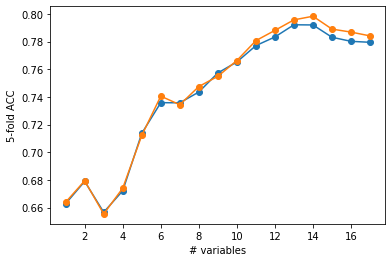

In [ ]:
plt.figure()
plt.xlabel("# variables")
plt.ylabel("5-fold ACC")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, '-o')
plt.show()

In [ ]:
print('Variables seleccionadas: ',[f for f in df_train.columns[rfecv.support_]] )
print('Acc (TEST): %0.2f'%rfecv.score(df_test,y_test))

Variables seleccionadas:  ['C_MNTH', 'C_WDAY', 'C_HOUR', 'C_VEHS', 'C_CONF', 'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_TYPE', 'P_AGE', 'P_SAFE', 'V_AGE']
Acc (TEST): 0.79


In [ ]:
print('Variables NO seleccionadas: ',[f for f in df_train.columns[~rfecv.support_]] )

Variables NO seleccionadas:  ['P_SEX', 'P_PSN', 'P_USER']


**Resultados**: 

Tras aplicar reducción de variables por el método RFE vemos que las variables: sexo de la persona, posición en el coche de la persona y usuario (conductor, acompañante) NO son significativas y pueden eliminarse.

El resultado es especialmente importante para la primera de las variables mencionadas, ya que asegura que el sexo de la persona no tiene poder explicativo en predecir si tendrá un accidente o no.

#### RFE con clasificador MLP: comprobación robustez resultados
Comprobamos ahora qué resultados obtenemos con MLP y eligiendo la métrica Average Precision. De esta manera comprobamos que los resultados de reducción de variables son robustos con un modelo que a priori presenta menos overfitting que Random Forest:

In [ ]:
modelo_mlp = MLPClassifier(hidden_layer_sizes=(200,150), learning_rate='adaptive', early_stopping=True)

rfecv_mlp = RFECV(estimator=mejor_modelo, step=1, cv=2, scoring='average_precision')
rfecv_mlp.fit(df_train, y_train)

RFECV(cv=2, estimator=RandomForestClassifier(max_depth=20),
      scoring='average_precision')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


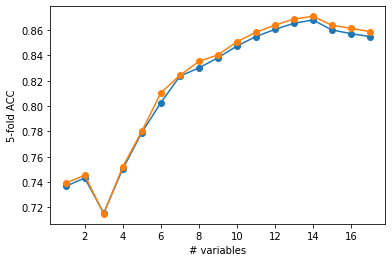

Acc (TEST): 0.79


In [ ]:
plt.figure()
plt.xlabel("# variables")
plt.ylabel("5-fold ACC")
plt.plot(range(1, len(rfecv_mlp.grid_scores_) + 1), rfecv_mlp.grid_scores_, '-o')
plt.show()
print('Acc (TEST): %0.2f'%rfecv_mlp.score(df_test,y_test))

De nuevo obtenemos los mismos resultados, con lo que la reducción de variables es robusta.

# 7. Aprendizaje No supervisado
Tratamos de ver cómo de adecuado es el algortimo de K-medias como primer ejemplo de aprendizaje no supervisado.

Es importante señalar que para usar k-medias necesitamos emplear nuestros datos estandarizados:

In [ ]:
from scipy.cluster.hierarchy import linkage
linkage_type = 'ward'
linkage_matrix = linkage(df_train_normal, linkage_type)

In [ ]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(22,18))

# Gráficando con 'dendrogram()'
dendrogram(linkage_matrix)

plt.show()
#seleccionamos 3 clusters

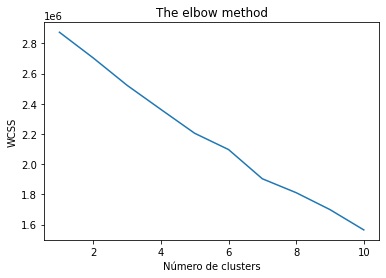

In [ ]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_train_normal)
    wcss.append(kmeans.inertia_)
    
# Mostrando los resultados en un gráfico para determinar un codo 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS') # Suma de cuadrados dentro del cluster
plt.show()

#salen 3 o 4 clusters, decido coger 3

Puesto que no vemos claro cuál es el número de clusters a elegir, incluso cuando variamos sensiblemente el número de clusters, tomamos la decisión de no emplear análisis no supervisado en nuestro trabajo. El problema está en que no somos capaces de encontrar el número de grupos a para el que la curva se hace convexa, ni siquiera cuando tomamos un número grande, por lo que concluimos que el uso de estos algoritmos no era apropiado.